<a href="https://colab.research.google.com/github/lucasleao03/GSI073---Topicos-Especiais-de-Inteligencia-Artificial-LLMs-Large-Language-Models-/blob/main/GSI073_aula0_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# 1. Carregar dados
iris = sklearn.datasets.load_iris()
X = iris.data        # 4 features: sépalas e pétalas
y = (iris.target == 0).astype(float)  # 1 se Versicolor, 0 caso contrário

# 2. Preparar dados para pytorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 3️. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# 3. Definir modelo
import torch.nn.functional as F
class RedeNeural(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RedeNeural, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



In [32]:
# 4. Criar modelo
modelo = RedeNeural(4, 8, 1)  # 4 features → 1 saída (probabilidade de ser Versicolor)

import copy
modelo_clonado = copy.deepcopy(modelo)

learning_rate = 0.1

# 5. Definir função de perda e algoritmo de otimização
funcao_perda = torch.nn.BCEWithLogitsLoss()  # combinação de sigmoid + BCE
optimizer = torch.optim.SGD(modelo.parameters(), lr=learning_rate)


In [33]:
# 6. Loop de treino
losses = []
for epoch in range(1000):
    optimizer.zero_grad()           # Limpa gradientes
    outputs = modelo(X_train)             # Forward
    loss = funcao_perda(outputs, y_train) # Calcula perda
    loss.backward()                 # Calcula derivadas do gradiente
    optimizer.step()                # Aplica regra de alteração dos parâmetros
    losses.append(loss.item())


    if (epoch + 1) % 100 == 0:
        print(f"Época [{epoch+1}/100], Loss: {loss.item():.4f}")

Época [100/100], Loss: 0.0222
Época [200/100], Loss: 0.0083
Época [300/100], Loss: 0.0049
Época [400/100], Loss: 0.0035
Época [500/100], Loss: 0.0027
Época [600/100], Loss: 0.0021
Época [700/100], Loss: 0.0018
Época [800/100], Loss: 0.0015
Época [900/100], Loss: 0.0013
Época [1000/100], Loss: 0.0012


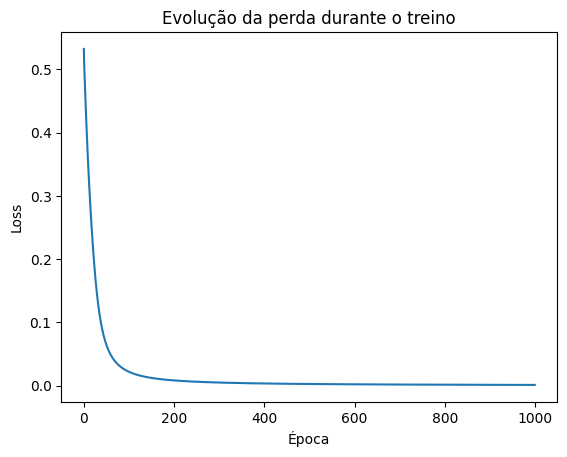


📊 Avaliação no conjunto de teste:
Acurácia : 1.0
Precisão : 1.0
Recall   : 1.0
F1-score : 1.0
Matriz de confusão:
 [[26  0]
 [ 0 19]]


In [34]:
# 7️. Visualizar a evolução da perda
plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Evolução da perda durante o treino')
plt.show()

# 8️. Avaliar no conjunto de teste
with torch.no_grad():
    y_pred_logits = modelo(X_test)
    y_pred = torch.sigmoid(y_pred_logits)
    y_pred_classes = (y_pred > 0.5).float()

# 9️. Converter para numpy para calcular métricas
y_true = y_test.numpy()
y_pred_classes = y_pred_classes.numpy()

print("\n📊 Avaliação no conjunto de teste:")
print("Acurácia :", accuracy_score(y_true, y_pred_classes))
print("Precisão :", precision_score(y_true, y_pred_classes))
print("Recall   :", recall_score(y_true, y_pred_classes))
print("F1-score :", f1_score(y_true, y_pred_classes))
print("Matriz de confusão:\n", confusion_matrix(y_true, y_pred_classes))